<div align="center">

## **Section 1: Title**

</div>

<div align="center">

## **Section 2: Introduction**

</div>

In [17]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
install.packages("patchwork")
library(patchwork)

Warning message in install.packages("patchwork"):
“installation of package ‘patchwork’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error in library(patchwork): there is no package called ‘patchwork’


1.loads data 
2.wrangles and cleans the data to the format necessary for the planned analysis
3.performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
4.creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
5.performs the data analysis
6.creates a visualization of the analysis 

### **1)Load Data**

In [ ]:
#Read the two datasets
player_url <- "https://raw.githubusercontent.com/Rylee628/DSCI-Individual-Project/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/Rylee628/DSCI-Individual-Project/refs/heads/main/sessions.csv"
players <- read_csv(player_url)
sessions <- read_csv(sessions_url)

### **2)wrangles and cleans the data**

In [ ]:
#Check for Duplicate Records for player data
nrow(players) - nrow(distinct(players))
#Check if there is NA value in Variables for session data
colSums(is.na(players))
#Remove NA value
players <- players|>
  filter(!is.na(Age))
#Check again
colSums(is.na(players))
#Check for Duplicate Records for session data
nrow(sessions) - nrow(distinct(sessions))

<div align="center">

## **Section 3: Methods & Results**

</div>

<div align="center">

## **Section 4: Discussion:**

</div>

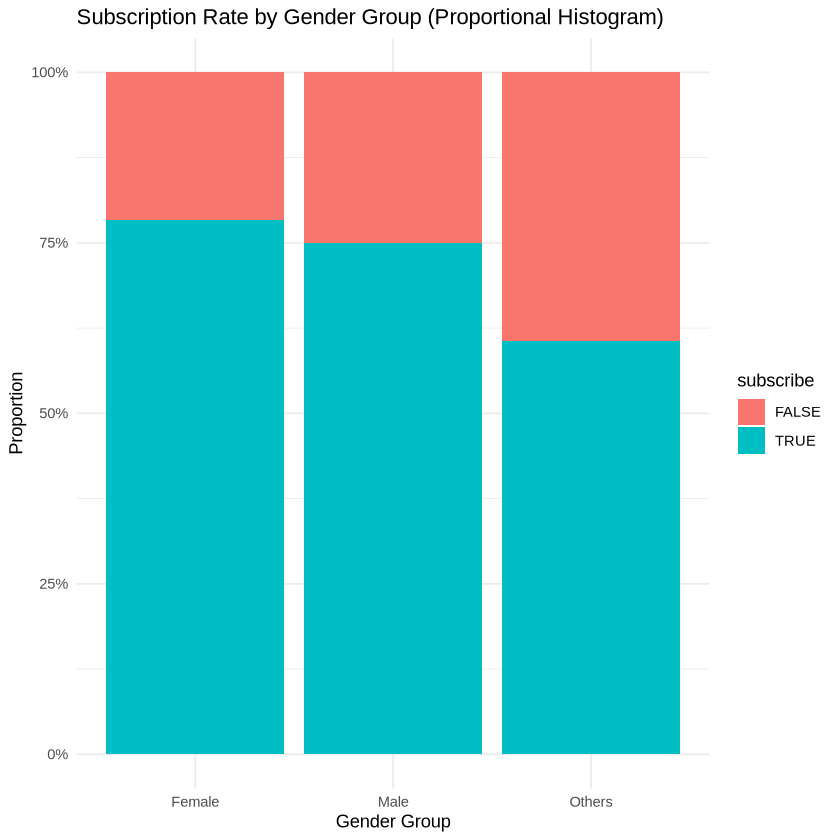

In [31]:
# subscription rate vs Gender
players |>
  mutate(gender_grouped = case_when(
    gender == "Male" ~ "Male",
    gender == "Female" ~ "Female",
    TRUE ~ "Others")) |>
  group_by(gender_grouped, subscribe) |>
  summarise(count = n(), .groups = "drop") |>
  group_by(gender_grouped) |>
  mutate(proportion = count / sum(count)) |>
  ggplot(aes(x = gender_grouped, y = proportion, fill = subscribe)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(
    title = "Subscription Rate by Gender Group (Proportional Histogram)",
    x = "Gender Group",
    y = "Proportion") +
  scale_y_continuous(labels = scales::percent_format()) +
  theme_minimal()


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


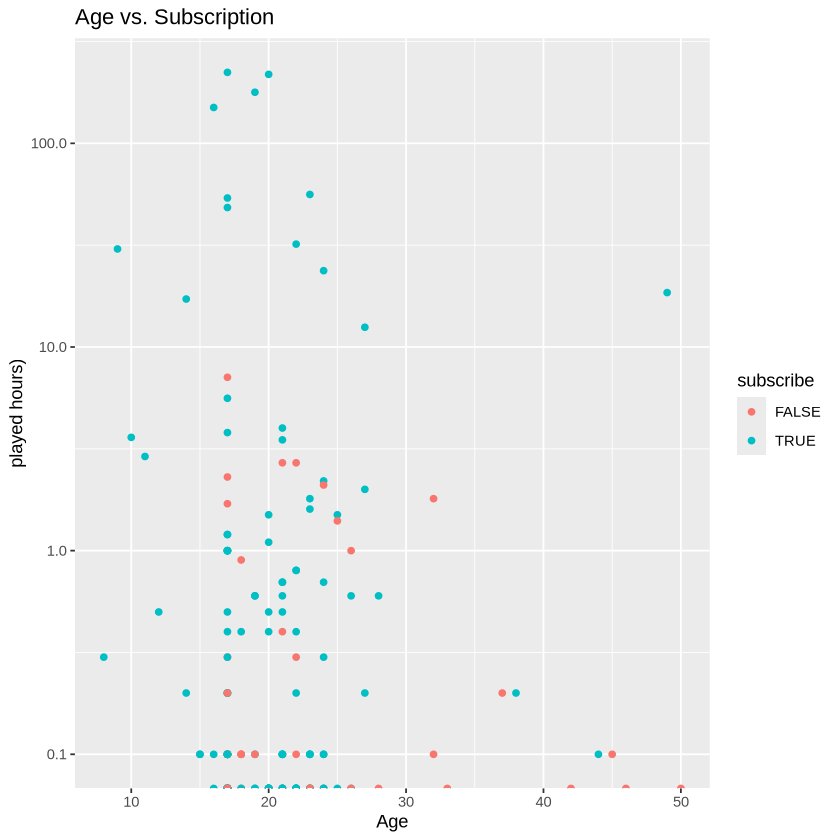

In [33]:
#age vs played_hours
distribution<-ggplot(players,
       aes(x = Age, y = played_hours,color=subscribe	)) +
  geom_point() +
  scale_y_log10()+#log
 labs(
    title = "Age vs. Subscription",
    x = "Age",
    y = "played hours)")
distribution


<div align="center">

## **Section 5: References:**

</div>